In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from comparers import ModelComparer, plot_decision_boundary
from baseline import print_rules, plot_tree_leafs_for_class
from tasks.running_example import make_task

In [2]:
clf_a, clf_b, X, y, feature_names = make_task()

In [3]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

# General Explanations

In [4]:
is_pred_diff = comparer.predict_bin_diff(X)
mclass_diff = comparer.predict_mclass_diff(X)
class_names = comparer.class_names

In [11]:
def explain(max_depth=None, tree_fig_size=(28, 14)):
    global tree
    tree = DecisionTreeClassifier(max_depth=max_depth)
    tree.fit(X, mclass_diff)
    
    fig, ax = plt.subplots(figsize=(14, 14))
    plot_tree(tree, feature_names=feature_names, class_names=class_names, ax=ax, node_ids=True, precision=2)
    
    for focus_class in comparer.difference_class_names:
        print(focus_class)
        print_rules(tree, feature_names, class_names, focus_class, X_test=X, y_test=mclass_diff, precision=2)
    
    plot_tree_leafs_for_class(tree, class_names, comparer.difference_class_names, X, mclass_diff, class_names, feature_names)
        
    print('\ndata evaluation:')
    print(classification_report(mclass_diff, tree.predict(X), target_names=class_names))

(0, 1)
node #5: if (x1 > -203.78) and (x1 <= -8.54) and (x2 > 97.94) then class (0, 1) (covers 1.0 of 34 instances)
(1, 0)
node #9: if (x1 > -8.54) and (x1 <= 150.3) and (x2 > -98.2) then class (1, 0) (covers 0.8 of 80 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       1.00      1.00      1.00       266
      (0, 1)       1.00      1.00      1.00        34
      (1, 0)       0.80      1.00      0.89        64
      (1, 1)       1.00      0.93      0.96       236

    accuracy                           0.97       600
   macro avg       0.95      0.98      0.96       600
weighted avg       0.98      0.97      0.97       600



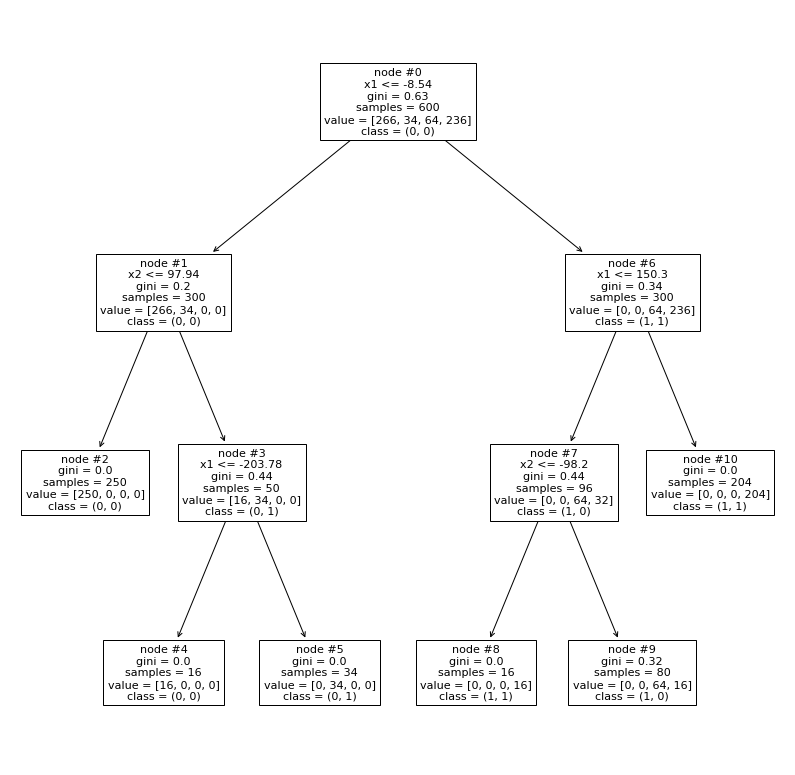

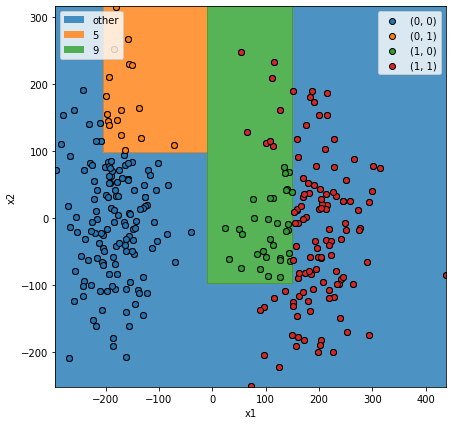

In [12]:
explain(max_depth=3)

Precision of $(1,0)$ is low.

(0, 1)
node #5: if (x1 > -203.78) and (x1 <= -8.54) and (x2 > 97.94) then class (0, 1) (covers 1.0 of 34 instances)
(1, 0)
node #10: if (x1 > -8.54) and (x1 <= 150.3) and (x2 > -98.2) and (x2 <= 92.22) then class (1, 0) (covers 1.0 of 64 instances)

data evaluation:
              precision    recall  f1-score   support

      (0, 0)       1.00      1.00      1.00       266
      (0, 1)       1.00      1.00      1.00        34
      (1, 0)       1.00      1.00      1.00        64
      (1, 1)       1.00      1.00      1.00       236

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



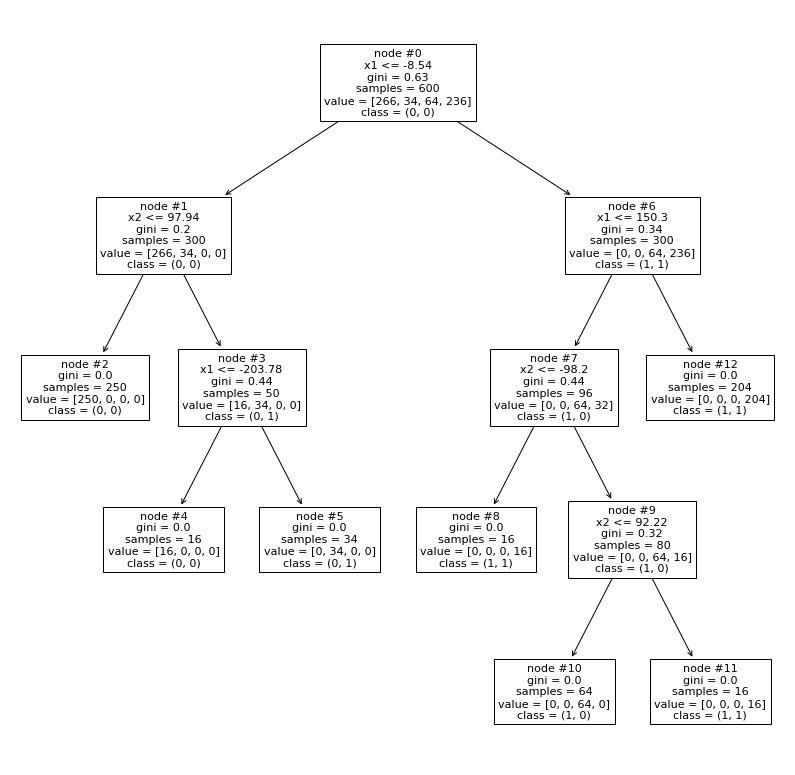

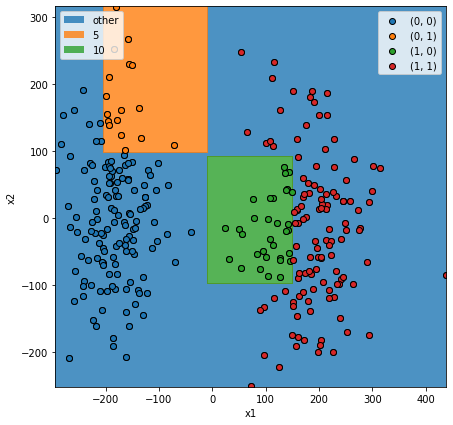

In [13]:
explain(max_depth=4)

# Explanation
- rule 1 (node 5): $-203.7<x1<-8.6, 97.9<x2 \rightarrow (0,1)$
- rule 2 (node 10): $-8.5<x1≤150.3$

# Evaluation

### Fidelity
- difference 1 (rule 1): x1 upper bound differs by 0.01; x2 lower bound differs by 0.41
- difference 2 (rule 10): x1 lower bound differs by 0.01, upper bound by 0.44; x2 lower bound differs by 9.94, upper bound by 5.31.

### Selectiveness
Best possible. (minimal set of rules to describe the differences detected)

### Predictability
The explanation generalizes only to difference 1 and 2, 3 is missing.

### Persuability
This example shows a disadvantage of methods, that do not generate new instances to base explanations on: it didn't detect difference 3, for which no instances exist in the data set. But this depends on the task at hand, it may not be an issue.